In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Import and merge data

In [2]:
# Load the data
households = pd.read_csv('data/LLINE-UP_rct_Households.txt', delimiter='\t', low_memory=False)
participants = pd.read_csv('data/LLINE-UP_rct_Participants.txt', delimiter='\t', low_memory=False)
samples = pd.read_csv('data/LLINE-UP_rct_Samples.txt', delimiter='\t')

In [3]:
# Function to print column names and data types
def print_column_info(df, df_name):
    print(f"\nColumns and data types for {df_name}:")
    for column, dtype in df.dtypes.items():
        print(f"- {column}: {dtype}")

In [4]:
# Print column info for each dataframe
print_column_info(households, "Households")
print_column_info(participants, "Participants")
print_column_info(samples, "Samples")


Columns and data types for Households:
- Household_Id: object
- Community_Id: object
- 1 ITN per 2 people [EUPATH_0044135]: object
- Acres [EUPATH_0000026]: float64
- Acres categorization [EUPATH_0020221]: object
- Air bricks [EUPATH_0000018]: object
- Arthropods surveyed [EUPATH_0044118]: object
- Asked permission for IRS in last 12 months [EUPATH_0020224]: object
- Bank account [EUPATH_0000167]: object
- Bed [ENVO_00000501]: object
- Bednet count [EUPATH_0020225]: int64
- Bednet count categorization [EUPATH_0020226]: object
- Bednets per person count [EUPATH_0020227]: float64
- Bicycle [ENVO_01000614]: object
- Bloodfed Anopheles funestus count [EUPATH_0000192]: float64
- Bloodfed Anopheles gambiae count [EUPATH_0000193]: float64
- Boat with a motor [EUPATH_0000179]: object
- Boat without a motor [EUPATH_0000170]: object
- Burn to keep mosquitoes away [EUPATH_0044128]: object
- Car or truck [EUPATH_0000171]: object
- Cassette player [ENVO_01000578]: object
- Ceiling [EUPATH_0044113]

In [5]:
# Define the original column names and their corresponding new names
household_column_mapping = {
    "Household_Id": "household_id",
    "Community_Id": "community_id",
    "1 ITN per 2 people [EUPATH_0044135]": "itn_per_2_people",
    "Acres [EUPATH_0000026]": "acres",
    "Acres categorization [EUPATH_0020221]": "acres_category",
    "Air bricks [EUPATH_0000018]": "air_bricks",
    "Arthropods surveyed [EUPATH_0044118]": "arthropods_surveyed",
    "Asked permission for IRS in last 12 months [EUPATH_0020224]": "irs_permission_last_12m",
    "Bank account [EUPATH_0000167]": "bank_account",
    "Bed [ENVO_00000501]": "has_bed",
    "Bednet count [EUPATH_0020225]": "net_count",
    "Bednet count categorization [EUPATH_0020226]": "net_count_category",
    "Bednets per person count [EUPATH_0020227]": "nets_per_person",
    "Bicycle [ENVO_01000614]": "has_bicycle",
    "Bloodfed Anopheles funestus count [EUPATH_0000192]": "bloodfed_mosquito_funestus",
    "Bloodfed Anopheles gambiae count [EUPATH_0000193]": "bloodfed_mosquito_gambiae",
    "Boat with a motor [EUPATH_0000179]": "has_motor_boat",
    "Boat without a motor [EUPATH_0000170]": "has_non_motor_boat",
    "Burn to keep mosquitoes away [EUPATH_0044128]": "burn_mosquito_repel",
    "Car or truck [EUPATH_0000171]": "has_car_or_truck",
    "Cassette player [ENVO_01000578]": "has_cassette_player",
    "Ceiling [EUPATH_0044113]": "has_ceiling",
    "Chair [ENVO_01000586]": "has_chair",
    "Clock [ENVO_01000596]": "has_clock",
    "Collection date [EUPATH_0020003]": "data_collection_date",
    "Community health worker has malaria medication [EUPATH_0020229]": "chw_malaria_medication",
    "Community health worker present [EUPATH_0020230]": "chw_present",
    "Cooking fuel [EUPATH_0000023]": "cooking_fuel_type",
    "Crowding [EUPATH_0044160]": "people_per_room",
    "Cupboard [ENVO_01000595]": "has_cupboard",
    "Desktop computer [EUPATH_0044107]": "has_desktop_computer",
    "Doors and windows closed [EUPATH_0044129]": "doors_windows_closed",
    "Drinking water source [ENVO_00003064]": "water_source",
    "Dwelling type [ENVO_01000744]": "dwelling_type",
    "Eaves [ENVO_01000825]": "has_eaves",
    "Electricity [EUPATH_0021084]": "has_electricity",
    "Enumeration area ID [EUPATH_0044123]": "enum_area_id",
    "Female Anopheles count [EUPATH_0000135]": "female_mosquito_count",
    "Female Anopheles funestus count [EUPATH_0000136]": "female_mosquito_funestus",
    "Female Anopheles gambiae count [EUPATH_0000137]": "female_mosquito_gambiae",
    "Female non-Anopheline count [EUPATH_0044116]": "female_non_anopheles_count",
    "Floor material [EUPATH_0000006]": "floor_type",
    "Food problems per week [EUPATH_0000029]": "food_insecurity_weekly",
    "Gravid Anopheles funestus count [EUPATH_0000197]": "gravid_mosquito_funestus",
    "Gravid Anopheles gambiae count [EUPATH_0000198]": "gravid_mosquito_gambiae",
    "Health facility distance (km) [EUPATH_0020213]": "health_facility_distance_km",
    "Health facility distance categorization [EUPATH_0020214]": "health_facility_distance_category",
    "Household ITNs [EUPATH_0044136]": "hh_itns",
    "Household bednets [EUPATH_0020232]": "hh_bednets",
    "Household data collection date [EUPATH_0021085]": "hh_data_collection_date",
    "Household study timepoint [EUPATH_0044122]": "hh_study_timepoint",
    "Household wealth index, categorical [EUPATH_0000143]": "hh_wealth_category",
    "Household wealth index, numerical [EUPATH_0000014]": "hh_wealth_score",
    "Human waste facilities [EUPATH_0000335]": "human_waste_facilities",
    "ITN bednet count [EUPATH_0041014]": "itn_count",
    "ITN bednet count categorization [EUPATH_0044126]": "itn_count_category",
    "ITNs per person count [EUPATH_0044137]": "itns_per_person",
    "Insecticide last night [EUPATH_0044130]": "insecticide_used_last_night",
    "Internet device [EUPATH_0020205]": "has_internet_device",
    "Internet device type [EUPATH_0044140]": "internet_device_type",
    "Laptop computer [EUPATH_0044108]": "has_laptop",
    "Lighting source [OBI_0400065]": "lighting_source",
    "Male Anopheles count [EUPATH_0025031]": "male_mosquito_count",
    "Male Anopheles funestus count [EUPATH_0044102]": "male_mosquito_funestus_count",
    "Male Anopheles gambiae count [EUPATH_0044104]": "male_mosquito_gambiae_count",
    "Male non-Anopheline count [EUPATH_0044117]": "male_non_anopheles_count",
    "Market distance (km) [EUPATH_0020215]": "market_distance_km",
    "Material burned [EUPATH_0044127]": "material_burned",
    "Meals per day [EUPATH_0000027]": "meals_per_day",
    "Meals per day categorization [EUPATH_0020237]": "meals_per_day_category",
    "Mean people per room [EUPATH_0011604]": "mean_people_per_room",
    "Meat meals per week [EUPATH_0000028]": "meat_meals_per_week",
    "Meat meals per week categorization [EUPATH_0020238]": "meat_meals_per_week_category",
    "Mobile phone [ENVO_01000581]": "has_mobile_phone",
    "Motorcycle or scooter [ENVO_01000615]": "has_motorcycle",
    "Non-UCC bednets [EUPATH_0044141]": "non_ucc_itns",
    "One bednet per 2 people [EUPATH_0020219]": "one_itn_per_2_people",
    "Other female Anopheles species count [EUPATH_0000200]": "other_female_mosquito_count",
    "Other male Anopheles species count [EUPATH_0044106]": "other_male_mosquito_count",
    "Persons 5-15 years sleeping in dwelling count [EUPATH_0044164]": "persons_5_15_sleeping_dwelling",
    "Persons 5-15 years sleeping under bednet count [EUPATH_0044158]": "persons_5_15_sleeping_under_itn",
    "Persons <5 years living in house [EUPATH_0044161]": "persons_under_5_living_house",
    "Persons <5 years sleeping in dwelling count [EUPATH_0044162]": "persons_under_5_sleeping_dwelling",
    "Persons <5 years sleeping under bednet count [EUPATH_0044156]": "persons_under_5_sleeping_under_itn",
    "Persons >15 years sleeping in dwelling count [EUPATH_0044163]": "persons_above_15_sleeping_dwelling",
    "Persons >15 years sleeping under bednet count [EUPATH_0044157]": "persons_above_15_sleeping_under_itn",
    "Persons age unknown sleeping under bednet count [EUPATH_0044159]": "persons_unknown_age_sleeping_under_itn",
    "Persons living in house count [EUPATH_0000019]": "persons_living_house",
    "Persons sleeping in dwelling count [EUPATH_0000714]": "persons_sleeping_dwelling",
    "Persons sleeping under bednet count [EUPATH_0044155]": "persons_sleeping_under_itn",
    "Persons unknown age sleeping in dwelling count [EUPATH_0044165]": "persons_unknown_age_sleeping_dwelling",
    "Radio [ENVO_01000577]": "has_radio",
    "Reason UCC LLIN not received [EUPATH_0044145]": "reason_ucc_itn_not_received",
    "Reason refused IRS [EUPATH_0044134]": "reason_refused_irs",
    "Refrigerator [ENVO_01000583]": "has_fridge",
    "Remaining UCC LLIN count [EUPATH_0044144]": "remaining_ucc_itn_count",
    "Roof material [EUPATH_0000003]": "roof_material",
    "Screened air bricks [EUPATH_0044115]": "screened_air_bricks",
    "Screened external doors [EUPATH_0044114]": "screened_external_doors",
    "Semigravid Anopheles funestus count [EUPATH_0044103]": "semigravid_mosquito_funestus_count",
    "Semigravid Anopheles gambiae count [EUPATH_0044105]": "semigravid_mosquito_gambiae_count",
    "Sleeping places count [EUPATH_0000201]": "sleeping_places_count",
    "Sleeping rooms in dwelling count [EUPATH_0000025]": "sleeping_rooms_count",
    "Sleeping rooms used last night count [EUPATH_0044119]": "sleeping_rooms_used_last_night",
    "Smartphone [EUPATH_0044109]": "has_smartphone",
    "Sofa [ENVO_01000588]": "has_sofa",
    "Sprayed in the last 12 months [EUPATH_0000441]": "sprayed_last_12_months",
    "Sprayed in the last 12 months categorization [EUPATH_0020250]": "sprayed_last_12_months_category",
    "Table [ENVO_01000584]": "has_table",
    "Tablet computer [EUPATH_0044110]": "has_tablet",
    "Television [ENVO_01000579]": "has_tv",
    "Time doors and windows closed [EUPATH_0044132]": "time_doors_windows_closed",
    "Time since last IRS (months) [EUPATH_0044131]": "time_since_last_irs_months",
    "Time since last UCC LLIN distribution (months) [EUPATH_0044166]": "time_since_last_ucc_itn_distribution",
    "Time since last UCC LLIN distribution categorization [EUPATH_0044167]": "time_since_last_ucc_itn_distribution_category",
    "Transit to health facility [EUPATH_0020217]": "transit_to_health_facility",
    "UCC LLIN count [EUPATH_0044146]": "ucc_itn_count",
    "UCC LLIN instructions received [EUPATH_0044143]": "ucc_itn_instructions_received",
    "UCC LLIN received [EUPATH_0044142]": "ucc_itn_received",
    "UCC LLIN type [EUPATH_0044148]": "ucc_itn_type",
    "UCC LLIN wave [EUPATH_0044168]": "ucc_itn_wave",
    "Unfed Anopheles funestus count [EUPATH_0000204]": "unfed_mosquito_funestus_count",
    "Unfed Anopheles gambiae count [EUPATH_0000205]": "unfed_mosquito_gambiae_count",
    "Wall material [EUPATH_0000009]": "wall_material",
    "Watch [EUPATH_0000186]": "has_watch",
    "Windows [EUPATH_0025050]": "has_windows",
    "Windows covered [EUPATH_0020212]": "windows_covered"
}

# Rename columns in the community dataframe
households.rename(columns=household_column_mapping, inplace=True)

# Display the renamed columns
print(households.columns)

Index(['household_id', 'community_id', 'itn_per_2_people', 'acres',
       'acres_category', 'air_bricks', 'arthropods_surveyed',
       'irs_permission_last_12m', 'bank_account', 'has_bed',
       ...
       'ucc_itn_instructions_received', 'ucc_itn_received', 'ucc_itn_type',
       'ucc_itn_wave', 'unfed_mosquito_funestus_count',
       'unfed_mosquito_gambiae_count', 'wall_material', 'has_watch',
       'has_windows', 'windows_covered'],
      dtype='object', length=127)


In [6]:
# Define the original column names and their corresponding new names for participants
participant_column_mapping = {
    "Participant_Id": "participant_id",
    "Household_Id": "household_id",
    "Community_Id": "community_id",
    "Age (years) [OBI_0001169]": "age_years",
    "Age <2 years [EUPATH_0044139]": "age_under_2",
    "Age group [EUPATH_0010367]": "age_group",
    "Bednet last night [EUPATH_0025013]": "bednet_used_last_night",
    "Consent for lab testing [EUPATH_0044111]": "consent_lab_testing",
    "Eligible for clinical survey [EUPATH_0044101]": "eligible_clinical_survey",
    "Febrile [EUPATH_0000097]": "febrile_status",
    "Household head age categorization (years) [EUPATH_0044151]": "hh_head_age_category",
    "Household head's sex [EUPATH_0044152]": "hh_head_sex",
    "ITN last night [EUPATH_0000216]": "itn_used_last_night",
    "Observation date [EUPATH_0004991]": "observation_date",
    "Relationship to household head [EUPATH_0000376]": "relationship_to_hh_head",
    "Relationship to household head categorization [EUPATH_0044138]": "relationship_to_hh_head_category",
    "Sex [PATO_0000047]": "sex",
    "Study timepoint [OBI_0001508]": "study_timepoint"
}

# Rename columns in the participants dataframe
participants.rename(columns=participant_column_mapping, inplace=True)

# Verify the changes
print(participants.columns)

Index(['participant_id', 'household_id', 'community_id', 'age_years',
       'age_under_2', 'age_group', 'bednet_used_last_night',
       'consent_lab_testing', 'eligible_clinical_survey', 'febrile_status',
       'hh_head_age_category', 'hh_head_sex', 'itn_used_last_night',
       'observation_date', 'relationship_to_hh_head',
       'relationship_to_hh_head_category', 'sex', 'study_timepoint'],
      dtype='object')


In [7]:
# Define the original column names and their corresponding new names for samples
sample_column_mapping = {
    "Sample_Id": "sample_id",
    "Participant_Id": "participant_id",
    "Household_Id": "household_id",
    "Community_Id": "community_id",
    "Anemia (hemoglobin <10 g/dL) [EUPATH_0020209]": "anemia_hemoglobin_below_10",
    "Anemia (hemoglobin <11 g/dL) [EUPATH_0011161]": "anemia_hemoglobin_below_11",
    "Anemia (hemoglobin <8 g/dL) [EUPATH_0044112]": "anemia_hemoglobin_below_8",
    "Blood smear barcode [CLINEPIDB_00662]": "blood_smear_barcode",
    "Blood smear performed [EUPATH_0041029]": "blood_smear_performed",
    "Filter paper barcode [CLINEPIDB_00661]": "filter_paper_barcode",
    "Hemoglobin (g/dL) [CMO_0000026]": "hemoglobin_gdl",
    "Hemoglobin measurement performed [EUPATH_0027005]": "hemoglobin_measured",
    "Plasmodium asexual stages, by microscopy result (/uL) [EUPATH_0000092]": "plasmodium_asexual_stages_microscopy_ul",
    "Plasmodium falciparum gametocytes, by microscopy [EUPATH_0027010]": "plasmodium_falciparum_gametocytes_microscopy",
    "Plasmodium, by RDT [EUPATH_0024217]": "plasmodium_detected_rdt",
    "Plasmodium, by thick smear microscopy [EUPATH_0024314]": "plasmodium_detected_thick_smear",
    "RDT performed [EUPATH_0027004]": "rdt_performed"
}

# Rename columns in the samples dataframe
samples.rename(columns=sample_column_mapping, inplace=True)

# Verify the changes
print(samples.columns)

Index(['sample_id', 'participant_id', 'household_id', 'community_id',
       'anemia_hemoglobin_below_10', 'anemia_hemoglobin_below_11',
       'anemia_hemoglobin_below_8', 'blood_smear_barcode',
       'blood_smear_performed', 'filter_paper_barcode', 'hemoglobin_gdl',
       'hemoglobin_measured', 'plasmodium_asexual_stages_microscopy_ul',
       'plasmodium_falciparum_gametocytes_microscopy',
       'plasmodium_detected_rdt', 'plasmodium_detected_thick_smear',
       'rdt_performed'],
      dtype='object')


In [8]:
# Merge Participants with Samples (Left Join on Participant ID)
merged_df = participants.merge(samples, on="participant_id", how="left")

# Rename `household_id_x` and `community_id_x`, then drop duplicates
merged_df.rename(columns={"household_id_x": "household_id", "community_id_x": "community_id"}, inplace=True)
merged_df.drop(columns=["household_id_y", "community_id_y"], errors="ignore", inplace=True)

# Merge with Households (Left Join on Household ID)
merged_df = merged_df.merge(households, on="household_id", how="left")
merged_df.rename(columns={"community_id_x": "community_id"}, inplace=True)
merged_df.drop(columns=["household_id_y", "community_id_y"], errors="ignore", inplace=True)

# Drop participant_id and sample_id columns
merged_df.drop(columns=["participant_id", "sample_id", "community_id"], errors="ignore", inplace=True)

# Verify the structure of the merged dataset
print(merged_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140270 entries, 0 to 140269
Columns: 154 entries, household_id to windows_covered
dtypes: float64(47), int64(4), object(103)
memory usage: 164.8+ MB
None


In [9]:
# Drop these columns as they are not needed for the analysis

merged_df.drop(columns=['observation_date', 'data_collection_date', 'female_non_anopheles_count','reason_ucc_itn_not_received', 
                        'non_ucc_itns', 'chw_malaria_medication', 
                        'chw_present', 'ucc_itn_type', 'enum_area_id', 'persons_5_15_sleeping_dwelling', 
                        'persons_5_15_sleeping_under_itn', 'sleeping_rooms_used_last_night', 
                        'persons_under_5_sleeping_dwelling', 'persons_under_5_sleeping_under_itn', 
                        'persons_unknown_age_sleeping_under_itn', 'persons_unknown_age_sleeping_dwelling', 
                        'other_female_mosquito_count', 'other_male_mosquito_count', 'blood_smear_barcode',
                        'filter_paper_barcode', 'ucc_itn_wave', 'study_timepoint', 'hh_study_timepoint',
                        'hh_data_collection_date', 'semigravid_mosquito_funestus_count',
                        'semigravid_mosquito_gambiae_count','male_mosquito_count', 'male_mosquito_funestus_count', 
                        'male_mosquito_gambiae_count', 'male_non_anopheles_count', 'bloodfed_mosquito_funestus', 
                        'bloodfed_mosquito_gambiae', 'gravid_mosquito_funestus', 'gravid_mosquito_gambiae', 
                        'unfed_mosquito_funestus_count', 'unfed_mosquito_gambiae_count', 'female_mosquito_funestus', 
                        'female_mosquito_gambiae', 'female_mosquito_count', 'arthropods_surveyed'], errors="ignore", inplace=True)

In [10]:
# Get the list of all column names in merged_df
column_list = merged_df.columns.tolist()

# Display the list of columns
print(column_list)


['household_id', 'age_years', 'age_under_2', 'age_group', 'bednet_used_last_night', 'consent_lab_testing', 'eligible_clinical_survey', 'febrile_status', 'hh_head_age_category', 'hh_head_sex', 'itn_used_last_night', 'relationship_to_hh_head', 'relationship_to_hh_head_category', 'sex', 'anemia_hemoglobin_below_10', 'anemia_hemoglobin_below_11', 'anemia_hemoglobin_below_8', 'blood_smear_performed', 'hemoglobin_gdl', 'hemoglobin_measured', 'plasmodium_asexual_stages_microscopy_ul', 'plasmodium_falciparum_gametocytes_microscopy', 'plasmodium_detected_rdt', 'plasmodium_detected_thick_smear', 'rdt_performed', 'itn_per_2_people', 'acres', 'acres_category', 'air_bricks', 'irs_permission_last_12m', 'bank_account', 'has_bed', 'net_count', 'net_count_category', 'nets_per_person', 'has_bicycle', 'has_motor_boat', 'has_non_motor_boat', 'burn_mosquito_repel', 'has_car_or_truck', 'has_cassette_player', 'has_ceiling', 'has_chair', 'has_clock', 'cooking_fuel_type', 'people_per_room', 'has_cupboard', 'ha

In [11]:
# Save merged_df to a CSV file
# output_csv_file = "merged_data.csv"
# merged_df.to_csv(output_csv_file, index=False)

# Data cleaning

In [12]:
# Only keep records where participant consented to lab testing
merged_df = merged_df[merged_df['consent_lab_testing'] == 'Yes']

# and drop the column since it is not needed any more
merged_df = merged_df.drop(columns=['consent_lab_testing'])

In [13]:
# Count the occurrences of each category in the identified Yes/No variables
yes_no_columns = [
    "people_per_room", "windows_covered", "has_bicycle", "has_cassette_player", "has_chair", "has_clock",
    "has_cupboard", "has_non_motor_boat", "has_motor_boat", "has_watch", "has_motorcycle", "has_fridge",
    "has_table", "has_tv", "blood_smear_performed", "rdt_performed", "anemia_hemoglobin_below_10",
    "anemia_hemoglobin_below_11", "anemia_hemoglobin_below_8", "hemoglobin_measured",
    "plasmodium_falciparum_gametocytes_microscopy", "plasmodium_detected_rdt",
    "plasmodium_detected_thick_smear", "age_under_2", "bednet_used_last_night", "itn_used_last_night",
    "febrile_status", "eligible_clinical_survey", "itn_per_2_people", "arthropods_surveyed",
    "has_desktop_computer", "hh_itns", "hh_bednets", "has_laptop", "one_itn_per_2_people",
    "persons_under_5_living_house", "has_smartphone", "sprayed_last_12_months", "has_tablet", "has_windows",
    "has_electricity", "has_mobile_phone", "has_radio", 'has_windows', 'has_electricity', 'has_mobile_phone', 
    'has_radio', 'burn_mosquito_repel', 'insecticide_used_last_night', 'bank_account', 'has_car_or_truck', 
    'has_sofa', 'has_bed', 'irs_permission_last_12m', 'ucc_itn_received', 'has_internet_device'
]

# create a function for this
# Create a dictionary to store category counts for each variable
category_counts = {}

for col in yes_no_columns:
    if col in merged_df.columns:
        category_counts[col] = merged_df[col].value_counts(dropna=False).to_dict()

# Convert the dictionary into a DataFrame for better visualization
category_counts_df = pd.DataFrame(category_counts).transpose()


In [14]:
category_counts_df

,NaN,No,Yes,Missing,Not applicable,Refused to answer,Don't know
people_per_room,29918.0,4491.0,4354.0,1.0,NaN,NaN,NaN
windows_covered,1354.0,1387.0,29410.0,NaN,6613.0,NaN,NaN
has_bicycle,NaN,27160.0,11603.0,NaN,NaN,1.0,NaN
has_cassette_player,NaN,35608.0,3155.0,NaN,NaN,1.0,NaN
has_chair,NaN,4125.0,34638.0,NaN,NaN,1.0,NaN
has_clock,NaN,34681.0,4082.0,NaN,NaN,1.0,NaN
has_cupboard,NaN,30908.0,7855.0,NaN,NaN,1.0,NaN
has_non_motor_boat,NaN,38559.0,204.0,NaN,NaN,1.0,NaN
has_motor_boat,NaN,38649.0,114.0,NaN,NaN,1.0,NaN
has_watch,1.0,34064.0,4698.0,NaN,NaN,1.0,NaN


In [15]:
# Drop rows where 'value is "Missing"
# List of variables where we need to remove "Missing" responses
vars_to_clean_missing = ['people_per_room', 'burn_mosquito_repel', 'insecticide_used_last_night']
for col in vars_to_clean_missing:
    merged_df = merged_df[merged_df[col] != "Missing"]

# Drop rows where value is "Refused to answer"
# List of variables where we need to remove "Refused to answer" responses
vars_to_clean_refused = ['has_bicycle', 'has_cassette_player', 'has_chair', 'has_clock', 'has_cupboard', 
                         'has_non_motor_boat', 'has_motor_boat', 'has_watch', 'has_motorcycle', 
                         'has_fridge', 'has_table', 'has_tv', 'bank_account', 'has_car_or_truck', 
                         'has_sofa', 'has_bed', 'has_internet_device']
for col in vars_to_clean_refused:
    merged_df = merged_df[merged_df[col] != "Refused to answer"]


# Drop rows where value is "Don't know"
# List of variables where we need to remove "Don't know" responses
vars_to_clean_dontknow = [
    'burn_mosquito_repel', 'insecticide_used_last_night', 'bank_account', 'has_car_or_truck', 
    'has_sofa', 'has_bed', 'irs_permission_last_12m', 'ucc_itn_received', 'has_internet_device']
for col in vars_to_clean_dontknow:
    merged_df = merged_df[merged_df[col] != "Don't know"]

# Save the cleaned dataset
merged_df.to_csv("cleaned_dataset.csv", index=False)

In [16]:
# Create a dictionary to store category counts for each variable
category_counts = {}

for col in yes_no_columns:
    if col in merged_df.columns:
        category_counts[col] = merged_df[col].value_counts(dropna=False).to_dict()

# Convert the dictionary into a DataFrame for better visualization
category_counts_df = pd.DataFrame(category_counts).transpose()
category_counts_df

,NaN,No,Yes,Not applicable
people_per_room,29892.0,4463.0,4332.0,NaN
windows_covered,1354.0,1384.0,29346.0,6603.0
has_bicycle,NaN,27106.0,11581.0,NaN
has_cassette_player,NaN,35539.0,3148.0,NaN
has_chair,NaN,4120.0,34567.0,NaN
has_clock,NaN,34619.0,4068.0,NaN
has_cupboard,NaN,30857.0,7830.0,NaN
has_non_motor_boat,NaN,38485.0,202.0,NaN
has_motor_boat,NaN,38573.0,114.0,NaN
has_watch,1.0,34006.0,4680.0,NaN


In [17]:
# Process each column individually to avoid length mismatches
for col in yes_no_columns:
    if col in merged_df.columns:
        merged_df[col] = merged_df[col].astype(str).replace({"Yes": 1, "No": 0, "nan": pd.NA})

# Handle 'windows_covered' separately
if "windows_covered" in merged_df.columns:
    merged_df["windows_covered"] = merged_df["windows_covered"].astype(str).replace({"Yes": 1, "No": 0, "Not applicable": pd.NA, "nan": pd.NA})

In [18]:
# Ensure both of these variables are numeric
integer_vars = ["meals_per_day", "meat_meals_per_week"]
merged_df[integer_vars] = merged_df[integer_vars].apply(pd.to_numeric, errors='coerce')

In [19]:
# Check for non-numeric values and missing data in integer_vars
non_numeric_counts = {}
missing_counts = {}

for col in integer_vars:
    if col in merged_df.columns:
        non_numeric_counts[col] = merged_df[col].apply(lambda x: not str(x).isdigit()).sum()  # Count non-numeric values
        missing_counts[col] = merged_df[col].isna().sum()  # Count missing values

# Convert results into a DataFrame for easier analysis
data_quality_df = pd.DataFrame({"Non-numeric Count": non_numeric_counts, "Missing Count": missing_counts})

# Display the results
data_quality_df

,Non-numeric Count,Missing Count
meals_per_day,38687,3
meat_meals_per_week,38687,14


In [20]:
# Drop records where 'meals_per_day' or 'meat_meals_per_week' are empty/missing
merged_df = merged_df.dropna(subset=['meals_per_day', 'meat_meals_per_week'])

In [21]:
# Check for non-numeric values and missing data in these fields
non_numeric_counts = {}
missing_counts = {}

for col in integer_vars:
    if col in merged_df.columns:
        non_numeric_counts[col] = merged_df[col].apply(lambda x: not str(x).isdigit()).sum()  # Count non-numeric values
        missing_counts[col] = merged_df[col].isna().sum()  # Count missing values

# Convert results into a DataFrame for easier analysis
data_quality_df = pd.DataFrame({"Non-numeric Count": non_numeric_counts, "Missing Count": missing_counts})

# Display the results
data_quality_df

,Non-numeric Count,Missing Count
meals_per_day,38672,0
meat_meals_per_week,38672,0


In [22]:
# Only keep records where there was a test for malaria performed
merged_df = merged_df[(merged_df['blood_smear_performed'] == 1) | (merged_df['rdt_performed'] == 1)]

# create 'malaria' variable: yes/no
merged_df['malaria'] = ((merged_df['plasmodium_detected_rdt'] == 1) | 
                         (merged_df['plasmodium_detected_thick_smear'] == 1)).astype(int)

In [23]:
# Save the cleaned dataset
merged_df.to_csv("binary_encoded_dataset.csv", index=False)

In [24]:
merged_df.head()

,household_id,age_years,age_under_2,age_group,bednet_used_last_night,eligible_clinical_survey,febrile_status,hh_head_age_category,hh_head_sex,itn_used_last_night,...,time_since_last_ucc_itn_distribution_category,transit_to_health_facility,ucc_itn_count,ucc_itn_instructions_received,ucc_itn_received,wall_material,has_watch,has_windows,windows_covered,malaria
7,h_100101003,9.0,0,5 - 15 years of age,1,1,1,40-49 years,Male,1,...,29-37 months,Car or motorcycle,NaN,NaN,<NA>,Mud and poles,0,1,1,0
8,h_100101003,7.0,0,5 - 15 years of age,1,1,1,40-49 years,Male,1,...,29-37 months,Car or motorcycle,NaN,NaN,<NA>,Mud and poles,0,1,1,0
9,h_100101003,5.0,0,5 - 15 years of age,1,1,1,40-49 years,Male,1,...,29-37 months,Car or motorcycle,NaN,NaN,<NA>,Mud and poles,0,1,1,0
12,h_100101007,6.0,0,5 - 15 years of age,0,1,1,30-39 years,Male,0,...,29-37 months,Car or motorcycle,NaN,NaN,<NA>,Mud and poles,0,1,1,1
20,h_100101011,7.0,0,5 - 15 years of age,0,1,1,50 or more years,Female,0,...,29-37 months,Car or motorcycle,NaN,NaN,<NA>,Burned bricks with plaster or cement,0,1,1,1


### Categorical values

In [25]:
# List of categorical variables to check
categorical_vars = [
    "acres_category", "health_facility_distance_category", "meals_per_day_category",
    "net_count_category", "meat_meals_per_week_category", "hh_head_age_category",
    "time_since_last_ucc_itn_distribution_category", "time_doors_windows_closed",
    "doors_windows_closed", "cooking_fuel_type", "transit_to_health_facility",
    "roof_material", "water_source", "relationship_to_hh_head", "floor_type",
    "wall_material", "lighting_source", "material_burned", "has_eaves", "itn_count_category",
    "human_waste_facilities", "internet_device_type", "air_bricks", "has_ceiling",
    "screened_air_bricks", "screened_external_doors", "ucc_itn_instructions_received",
    "sex", "hh_head_sex", "age_group", "reason_refused_irs",
    "relationship_to_hh_head_category", "sprayed_last_12_months_category",
    "dwelling_type", "hh_wealth_category", "study_timepoint", "hh_study_timepoint",
    "ucc_itn_wave", "food_insecurity_weekly", "consent_lab_testing"
]

In [26]:
# Assuming merged_df is your DataFrame and categorical_vars is defined
category_dominance = {}
nan_percentages = {}

for col in categorical_vars:
    if col in merged_df.columns:
        # Calculate value counts including NaN values
        value_counts = merged_df[col].value_counts(dropna=False, normalize=True) * 100  # Convert to percentage
        if not value_counts.empty:
            top_category = value_counts.idxmax()  # Category with the highest percentage
            top_percentage = value_counts.max()  # Its percentage
            category_dominance[col] = {"Top Category": top_category, "Percentage": top_percentage}
        
        # Calculate percentage of NaN values separately using isnull()
        nan_count = merged_df[col].isnull().sum()  # Count of NaN values
        nan_percentages[col] = (nan_count / len(merged_df)) * 100

# Convert to DataFrames for easy analysis
category_dominance_df = pd.DataFrame.from_dict(category_dominance, orient="index")
nan_percentage_df = pd.DataFrame.from_dict(nan_percentages, orient="index", columns=["NaN Percentage"])

# Merge both tables for a complete view
final_df = category_dominance_df.merge(nan_percentage_df, left_index=True, right_index=True, how="left")

# Sort the DataFrame by NaN Percentage in descending order
final_df_sorted = final_df.sort_values(by="NaN Percentage", ascending=False)


# Display the sorted table
final_df_sorted


,Top Category,Percentage,NaN Percentage
reason_refused_irs,NaN,99.956023,99.956023
internet_device_type,NaN,90.821843,90.821843
material_burned,NaN,82.955222,82.955222
screened_air_bricks,NaN,81.250485,81.250485
screened_external_doors,NaN,79.545749,79.545749
doors_windows_closed,NaN,79.543162,79.543162
has_ceiling,NaN,79.543162,79.543162
air_bricks,NaN,79.543162,79.543162
time_doors_windows_closed,NaN,79.543162,79.543162
time_since_last_ucc_itn_distribution_category,NaN,77.300360,77.300360


In [27]:
# Drop these columns as they are not needed for the analysis
# they have a very large percentage of NaN and cannot be used in the analysis
more_columns_to_drop = ['reason_refused_irs', 'internet_device_type', 'material_burned', 
                        'screened_air_bricks', 'screened_external_doors', 'air_bricks', 
                        'time_doors_windows_closed', 'doors_windows_closed', 'has_ceiling', 
                        'hh_wealth_category', 'hh_head_age_category', 'time_since_last_ucc_itn_distribution_category', 
                        'dwelling_type', 'hh_head_sex', 'ucc_itn_instructions_received', 'material_burned']
merged_df.drop(columns=more_columns_to_drop, errors="ignore", inplace=True)

In [28]:
# Drop records where 'acres_category' or 'health_facility_distance_category' are NaN
# they are a very small percentage and will only drop a few records
merged_df = merged_df.dropna(subset=['acres_category', 'health_facility_distance_category', 'acres_category', 'water_source', 
                                     'food_insecurity_weekly', 'wall_material', 'lighting_source'])

In [29]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38619 entries, 7 to 140269
Data columns (total 99 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   household_id                                  38619 non-null  object 
 1   age_years                                     38619 non-null  float64
 2   age_under_2                                   38619 non-null  int64  
 3   age_group                                     38619 non-null  object 
 4   bednet_used_last_night                        38619 non-null  int64  
 5   eligible_clinical_survey                      38619 non-null  int64  
 6   febrile_status                                38619 non-null  int64  
 7   itn_used_last_night                           38619 non-null  int64  
 8   relationship_to_hh_head                       38619 non-null  object 
 9   relationship_to_hh_head_category              38619 non-null  obj

In [30]:
# Calculate category proportions including NaN values
category_dominance = {}
nan_percentages = {}

for col in categorical_vars:
    if col in merged_df.columns:
        value_counts = merged_df[col].value_counts(dropna=False, normalize=True) * 100  # Convert to percentage
        if not value_counts.empty:
            top_category = value_counts.idxmax()  # Category with the highest percentage
            top_percentage = value_counts.max()  # Its percentage
            category_dominance[col] = {"Top Category": top_category, "Percentage": top_percentage}
        
        # Calculate percentage of NaN values separately
        nan_count = merged_df[col].isna().sum()
        nan_percentages[col] = (nan_count / len(merged_df)) * 100

# Convert to DataFrames for easy analysis
category_dominance_df = pd.DataFrame.from_dict(category_dominance, orient="index")
nan_percentage_df = pd.DataFrame.from_dict(nan_percentages, orient="index", columns=["NaN Percentage"])

# Merge both tables for a complete view
final_df = category_dominance_df.merge(nan_percentage_df, left_index=True, right_index=True, how="left")

# Sort the DataFrame by NaN Percentage in descending order
final_df_sorted = final_df.sort_values(by="Percentage", ascending=False)

# Display the sorted table
final_df_sorted

,Top Category,Percentage,NaN Percentage
sprayed_last_12_months_category,No IRS in past 12 months,99.627127,0.0
roof_material,Metal sheets,86.548072,0.0
cooking_fuel_type,Firewood,82.467179,0.0
relationship_to_hh_head_category,1st degree relative,79.059530,0.0
relationship_to_hh_head,Son / daughter,78.593438,0.0
has_eaves,Closed,65.827701,0.0
transit_to_health_facility,Walking,58.212279,0.0
age_group,5 - 15 years of age,56.997851,0.0
sex,Female,51.094021,0.0
meals_per_day_category,2,48.939641,0.0


In [31]:
categorical_vars_to_keep = [
    'sprayed_last_12_months_category', 'roof_material', 'cooking_fuel_type', 'relationship_to_hh_head_category', 
    'relationship_to_hh_head', 'has_eaves', 'transit_to_health_facility', 'age_group', 'sex', 'meals_per_day_category', 
    'wall_material', 'health_facility_distance_category', 'net_count_category', 'food_insecurity_weekly', 
    'itn_count_category', 'meat_meals_per_week_category', 'human_waste_facilities', 'floor_type', 'acres_category', 
    'lighting_source', 'water_source'
]

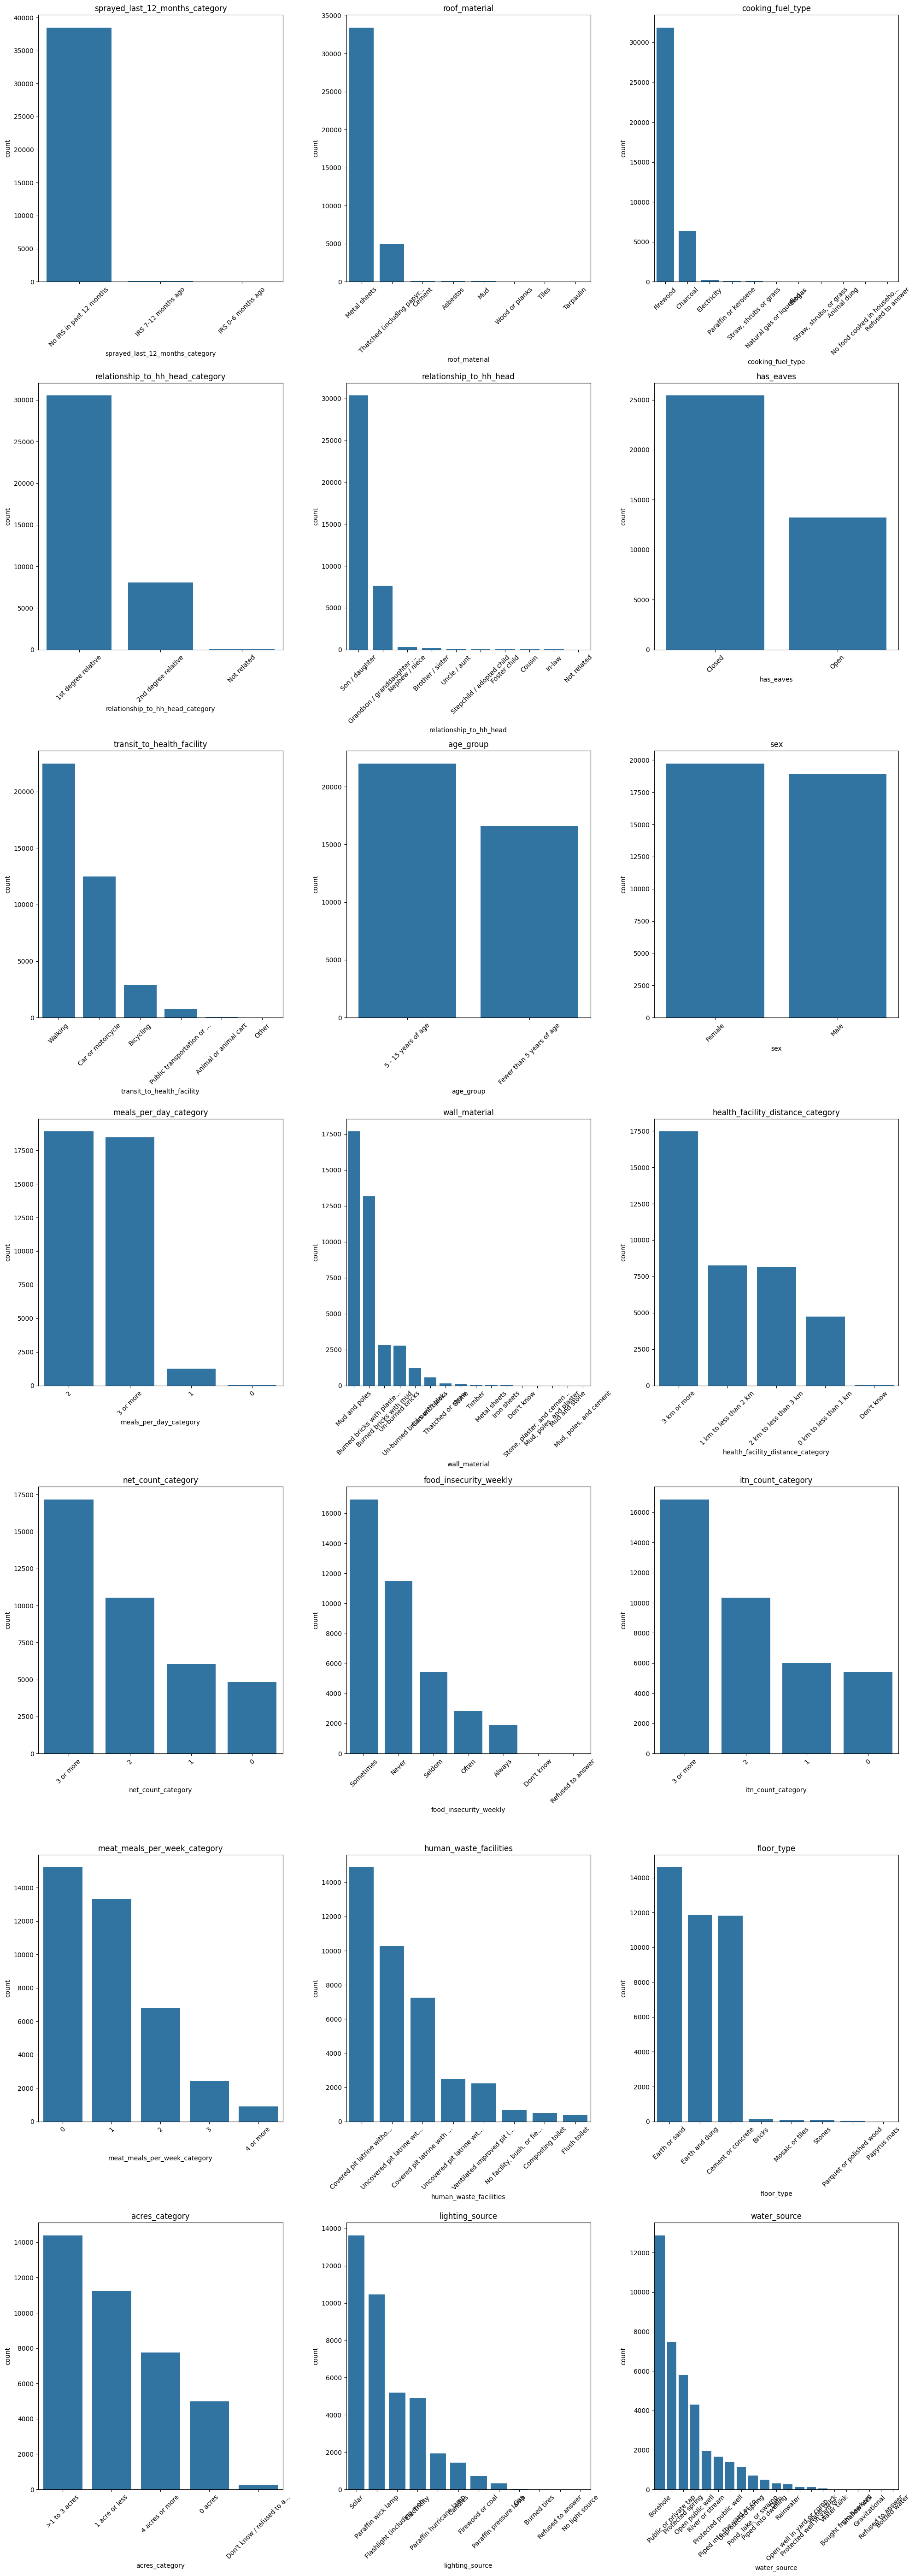

In [32]:
# Set the number of columns for subplots
num_cols = 3  
num_vars = len(categorical_vars_to_keep)
num_rows = -(-num_vars // num_cols)  # Compute number of rows needed

# Increase figure size for better visibility
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 8))
axes = axes.flatten()

for i, col in enumerate(categorical_vars_to_keep):
    sns.countplot(data=merged_df, x=col, ax=axes[i], order=merged_df[col].value_counts().index)

    # Get current tick positions
    current_ticks = axes[i].get_xticks()

    # Truncate x-tick labels to 25 characters
    labels = [label.get_text()[:25] + '...' if len(label.get_text()) > 25 else label.get_text() for label in axes[i].get_xticklabels()]

    # Set ticks and labels explicitly
    axes[i].set_xticks(current_ticks)  # Set current tick positions
    axes[i].set_xticklabels(labels, rotation=45)  # Set truncated labels

    axes[i].set_title(col)

plt.tight_layout()
plt.show()

Which Fields to Drop? Since a single category dominates in some fields, we should consider dropping variables where one category accounts for >80% of the data because they won't provide much useful variation for analysis.

Recommended Fields for Removal: Based on your table, these variables have a dominant category covering over 80% of records:

sprayed_last_12_months_category → "No IRS in past 12 months" (99.6%) roof_material → "Metal sheets" (86.5%) cooking_fuel_type → "Firewood" (82.5%) Since they have very little variability, they won’t contribute meaningful insights in most analyses.

In [33]:
# Drop these columns as they are not needed for the analysis
more_columns_to_drop = ['sprayed_last_12_months_category', 'roof_material', 'cooking_fuel_type']
merged_df.drop(columns=more_columns_to_drop, errors="ignore", inplace=True)

In [34]:
# Calculate category proportions including NaN values
#####
#### create a function for this since using it twice
category_dominance = {}
nan_percentages = {}

for col in categorical_vars:
    if col in merged_df.columns:
        value_counts = merged_df[col].value_counts(dropna=False, normalize=True) * 100  # Convert to percentage
        if not value_counts.empty:
            top_category = value_counts.idxmax()  # Category with the highest percentage
            top_percentage = value_counts.max()  # Its percentage
            category_dominance[col] = {"Top Category": top_category, "Percentage": top_percentage}
        
        # Calculate percentage of NaN values separately
        nan_count = merged_df[col].isna().sum()
        nan_percentages[col] = (nan_count / len(merged_df)) * 100

# Convert to DataFrames for easy analysis
category_dominance_df = pd.DataFrame.from_dict(category_dominance, orient="index")
nan_percentage_df = pd.DataFrame.from_dict(nan_percentages, orient="index", columns=["NaN Percentage"])

# Merge both tables for a complete view
final_df = category_dominance_df.merge(nan_percentage_df, left_index=True, right_index=True, how="left")

# Sort the DataFrame by NaN Percentage in descending order
final_df_sorted = final_df.sort_values(by="Percentage", ascending=False)

# Display the sorted table
final_df_sorted

,Top Category,Percentage,NaN Percentage
relationship_to_hh_head_category,1st degree relative,79.059530,0.0
relationship_to_hh_head,Son / daughter,78.593438,0.0
has_eaves,Closed,65.827701,0.0
transit_to_health_facility,Walking,58.212279,0.0
age_group,5 - 15 years of age,56.997851,0.0
sex,Female,51.094021,0.0
meals_per_day_category,2,48.939641,0.0
wall_material,Mud and poles,45.775396,0.0
health_facility_distance_category,3 km or more,45.226443,0.0
net_count_category,3 or more,44.483285,0.0


### One-hot encoding for categorical variables

In [35]:
# List of categorical columns to one-hot encode
categorical_columns = [
    "acres_category", "age_group", "floor_type", "food_insecurity_weekly",
    "has_eaves", "health_facility_distance_category", "human_waste_facilities",
    "itn_count_category", "lighting_source", "meals_per_day_category",
    "meat_meals_per_week_category", "net_count_category",
    "relationship_to_hh_head", "relationship_to_hh_head_category",
    "transit_to_health_facility", "wall_material", "water_source"
]

# Replace 'Don't know' and 'Refused to answer' with NaN before encoding
merged_df.replace(["Don't know", "Refused to answer", "Don't know / refused to answer"], pd.NA, inplace=True)

# Perform one-hot encoding
merged_df = pd.get_dummies(merged_df, columns=categorical_columns, drop_first=True, dtype=int)

# Update the 'sex' variable
merged_df['sex'].replace({'Male': 1, 'Female': 2}, inplace=True)

### Numerical variables

In [36]:
# List of variables to plot (excluding itn_count)
numeric_variables = [
    'hemoglobin_gdl',
    'plasmodium_asexual_stages_microscopy_ul',
    'age_years',
    'health_facility_distance_km',
    'market_distance_km',
    'nets_per_person',
    'net_count',
    'itns_per_person',
    'itn_count',
    'mean_people_per_room',
    'time_since_last_irs_months',
    'time_since_last_ucc_itn_distribution',
    'persons_above_15_sleeping_dwelling',
    'persons_above_15_sleeping_under_itn',
    'persons_sleeping_dwelling',
    'persons_sleeping_under_itn',
    'remaining_ucc_itn_count',
    'ucc_itn_count',
    'acres',
    'persons_living_house',
    'sleeping_rooms_count',
    'sleeping_places_count',
    'hh_wealth_score'
]

In [37]:
# Calculate the percentage of missing values for each numeric variable
missing_percentages = merged_df[numeric_variables].isnull().sum() * 100 / len(merged_df)

# Sort the missing percentages in descending order
sorted_missing_percentages = missing_percentages.sort_values(ascending=False)

# Print the sorted percentages
print("Percentage of missing values (sorted):")
print(sorted_missing_percentages)


Percentage of missing values (sorted):
time_since_last_irs_months                 99.627127
persons_sleeping_under_itn                 95.507393
persons_sleeping_dwelling                  95.507393
persons_above_15_sleeping_under_itn        95.507393
persons_above_15_sleeping_dwelling         95.507393
time_since_last_ucc_itn_distribution       77.278024
mean_people_per_room                       77.278024
hh_wealth_score                            77.278024
hemoglobin_gdl                             57.122142
remaining_ucc_itn_count                    46.798208
ucc_itn_count                              27.763536
acres                                       0.460913
market_distance_km                          0.077682
health_facility_distance_km                 0.069914
plasmodium_asexual_stages_microscopy_ul     0.025894
sleeping_rooms_count                        0.002589
itn_count                                   0.000000
itns_per_person                             0.000000
net_cou

In [38]:
# Drop these columns as they have a lot of missing data
# Will keep hemoglobin_gdl since I might look at hemoglobin levels
numeric_columns_to_drop = ['time_since_last_irs_months', 'persons_sleeping_under_itn', 'persons_sleeping_dwelling', 
                           'persons_above_15_sleeping_under_itn', 'persons_above_15_sleeping_dwelling', 
                           'time_since_last_ucc_itn_distribution', 'mean_people_per_room', 'hh_wealth_score', 
                           'remaining_ucc_itn_count', 'ucc_itn_count']
merged_df.drop(columns=numeric_columns_to_drop, errors="ignore", inplace=True)

In [39]:
numeric_columns = ['acres', 'market_distance_km', 'health_facility_distance_km', 'plasmodium_asexual_stages_microscopy_ul', 
                   'sleeping_rooms_count', 'itn_count', 'itns_per_person', 'net_count', 'nets_per_person', 
                   'age_years', 'persons_living_house', 'sleeping_places_count', 'hemoglobin_gdl']

# Calculate the percentage of missing values for each numeric variable
missing_percentages = merged_df[numeric_columns].isnull().sum() * 100 / len(merged_df)

# Sort the missing percentages in descending order
sorted_missing_percentages = missing_percentages.sort_values(ascending=False)

# Print the sorted percentages
print("Percentage of missing values (sorted):")
print(sorted_missing_percentages)


Percentage of missing values (sorted):
hemoglobin_gdl                             57.122142
acres                                       0.460913
market_distance_km                          0.077682
health_facility_distance_km                 0.069914
plasmodium_asexual_stages_microscopy_ul     0.025894
sleeping_rooms_count                        0.002589
itn_count                                   0.000000
itns_per_person                             0.000000
net_count                                   0.000000
nets_per_person                             0.000000
age_years                                   0.000000
persons_living_house                        0.000000
sleeping_places_count                       0.000000
dtype: float64


In [40]:
# List of variables to check for missing values
variables_to_check = [
    'acres',
    'market_distance_km',
    'health_facility_distance_km',
    'plasmodium_asexual_stages_microscopy_ul',
    'sleeping_rooms_count'
]

# Drop records where any of the specified variables have missing values
merged_df.dropna(subset=variables_to_check, inplace=True)

# Check the shape of the DataFrame after dropping
print("Shape of DataFrame after dropping records with missing values:", merged_df.shape)


Shape of DataFrame after dropping records with missing values: (38382, 167)


In [41]:
# Assuming merged_df is your DataFrame
correlation_matrix = merged_df[numeric_columns + ['malaria']].corr()
correlation_with_malaria = correlation_matrix['malaria'].drop('malaria')
print(correlation_with_malaria)


acres                                      0.001371
market_distance_km                         0.020542
health_facility_distance_km                0.090516
plasmodium_asexual_stages_microscopy_ul    0.262017
sleeping_rooms_count                      -0.058921
itn_count                                 -0.067491
itns_per_person                           -0.123295
net_count                                 -0.068852
nets_per_person                           -0.126023
age_years                                  0.024051
persons_living_house                       0.084141
sleeping_places_count                     -0.010540
hemoglobin_gdl                            -0.274288
Name: malaria, dtype: float64


Based on the updated correlation values you provided between the numeric variables and the malaria outcome, we can analyze which variables might be significant for your analysis. Here’s how to interpret the correlations and decide which variables to keep or discard:

Interpretation of Correlation
s
 .	Strength of Correlation - 
•	Strong Positive Correlation (0.3 to 1): Indicates a strong direct relationship with the outcom - 
•	Strong Negative Correlation (-0.3 to -1): Indicates a strong inverse relationship with the outco - .
•	Weak Correlation (close to 0): Indicates little to no linear relationship with the out
come.
2.	Relevant Varia- es:
•	Positive Correlations:
•	plasmodium_asexual_stages_microscopy_ul: 0.262 (moderate positive correlation). This variable shows a significant positive relationship with malaria, suggesting that higher levels of this variable are associated with a higher likelihood of malaria.
•	health_facility_distance_km: 0.0905 (weak positive correlation). Although weak, it suggests that as distance increases, there may be a slight increase in malaria incidence.
•	persons_living_house: 0.0841 (weak positive correlation). This variable may indicate that more people living in a house could relate to increased risk.
•	Negative Correlations:
•	hemoglobin_gdl: -0.274 (moderate negative correlation). This indicates that higher hemoglobin levels are associated with lower malaria incidence, suggesting that individuals with better health (higher hemoglobin) are less likely to have malaria.
•	Other variables like itn_count, itns_per_person, and nets_per_person show weak negative correlations, indicating that higher values may be associated with lower malaria incidence, but these relationships are not strong.
Recommendations for Feature Selection
Based on this analysis, here’s what you might consider keeping or discarding:
Keep Variables:
1.	Keep Variables with Moderate Correlation:
•	plasmodium_asexual_stages_microscopy_ul: Strong positive correlation suggests it is important for predicting malaria.
•	hemoglobin_gdl: Strong negative correlation indicates it is also significant and should be kept.
2.	Consider Keeping Weakly Correlated Variables:
•	health_facility_distance_km: While weakly correlated, it could still provide context about access to healthcare.
•	persons_living_house: Slightly positive correlation may provide additional context.
Discard Variables:
1.	Drop Variables with Very Weak Correlation:
•	acres: 0.0014 (very weak).
•	market_distance_km: 0.0205 (very weak).
•	sleeping_rooms_count: -0.0589 (very weak).
•	itn_count, itns_per_person, and nets_per_person: Although they have negative correlations, they are still weak and may not provide significant predictive power.
Final Decision
You might consider retaining the following variables for your analysis:
python
selected_numeric_variables = [
    'plasmodium_asexual_stages_microscopy_ul',
    'hemoglobin_gdl',
    'health_facility_distance_km',  # Optional based on further analysis
    'persons_living_house'            # Optional based on further analysis
]

iving_house'            # Optional based on further analysis
]

In [42]:
# these variables all have very weak correlations with the outcome variable - malaria
more_numeric_columns_to_drop = ['acres', 'market_distance_km', 'sleeping_rooms_count', 'itn_count', 'itns_per_person', 'nets_per_person']
merged_df.drop(columns=more_numeric_columns_to_drop, errors="ignore", inplace=True)

In [43]:
# Optionally, you can check the shape of the DataFrame after dropping
print("Shape of DataFrame after dropping records with missing values:", merged_df.shape)

Shape of DataFrame after dropping records with missing values: (38382, 161)


In [44]:
numeric_columns = ['health_facility_distance_km', 'plasmodium_asexual_stages_microscopy_ul', 
                   'net_count', 'age_years', 'persons_living_house', 'sleeping_places_count', 'hemoglobin_gdl']

In [45]:
# Assuming merged_df is your DataFrame and 'malaria' is the outcome variable
p_values = {}

for var in numeric_columns:
    # Perform T-test
    group1 = merged_df[merged_df['malaria'] == 1][var]
    group0 = merged_df[merged_df['malaria'] == 0][var]
    
    # Calculate T-test
    t_stat, p_val = stats.ttest_ind(group1, group0, nan_policy='omit')
    p_values[var] = p_val

# Convert to DataFrame for better visualization
p_values_df = pd.DataFrame.from_dict(p_values, orient='index', columns=['p_value'])
print(p_values_df.sort_values(by='p_value'))


                                               p_value
plasmodium_asexual_stages_microscopy_ul   0.000000e+00
hemoglobin_gdl                           1.087399e-281
health_facility_distance_km               1.222630e-70
persons_living_house                      2.956472e-61
net_count                                 1.470862e-41
age_years                                 2.447996e-06
sleeping_places_count                     3.893558e-02


### Interpretation of P-Values

#### Understanding P-Values
- A p-value measures the strength of evidence against the null hypothesis. In this context, the null hypothesis typically states that there is no relationship between the predictor variable and the outcome (`malaria`).
- A common threshold for significance is **0.05**:
  - **p-value < 0.05**: Indicates strong evidence against the null hypothesis, suggesting that the variable is statistically significant in predicting malaria.
  - **p-value ≥ 0.05**: Indicates weak evidence against the null hypothesis, suggesting that the variable may not be significant.

---

### Evaluation of Remaining Variables

| Variable                                      | P-Value           | Significance                      |
|-----------------------------------------------|-------------------|-----------------------------------|
| `plasmodium_asexual_stages_microscopy_ul`     | 0.000000e+00      | Highly significant (p < 0.001)    |
| `hemoglobin_gdl`                              | 1.087399e-281     | Highly significant (p < 0.001)    |
| `health_facility_distance_km`                 | 1.222630e-70      | Highly significant (p < 0.001)    |
| `persons_living_house`                        | 2.956472e-61      | Highly significant (p < 0.001)    |
| `net_count`                                   | 1.470862e-41      | Highly significant (p < 0.001)    |
| `age_years`                                   | 2.447996e-06      | Highly significant (p < 0.001)    |
| `sleeping_places_count`                       | 3.893558e-02      | Marginally significant (p ≈ 0.039) |

---

### Recommendations for Feature Selection

#### Keep Variables:
1. **Highly Significant Variables** (p < 0.001):
   - `plasmodium_asexual_stages_microscopy_ul`: Strongly associated with malaria.
   - `hemoglobin_gdl`: Strongly associated with malaria; higher levels correlate with lower incidence.
   - `health_facility_distance_km`: Important for understanding access to healthcare.
   - `persons_living_house`: Indicates household density, which may relate to malaria risk.
   - `net_count`: Suggests a relationship between bed net availability and malaria incidence.
   - `age_years`: Age could be a factor in susceptibility to malaria.

#### Consider Dropping:
2. **Marginally Significant Variable**:
   - `sleeping_places_count`: With a p-value of approximately 0.039, this variable is marginally significant but still below the threshold of significance (0.05). You may choose to keep it for further analysis or drop it if you prefer a stricter criterion.

---

### Final Decision

Based on the p-values, you should keep all variables except possibly `sleeping_places_count`, depending on your criteria for significance.



In [46]:
# Save the transformed dataset
# merged_df_encoded.to_csv("encoded_dataset.csv", index=False)

In [47]:
# Assuming merged_df is your DataFrame
# Count the number of missing values in each column
missing_counts = merged_df.isnull().sum()

# Filter to keep only columns with missing values
missing_data = missing_counts[missing_counts > 0]

# Create a new DataFrame to display missing data
missing_df = pd.DataFrame(missing_data).reset_index()
missing_df.columns = ['Variable', 'Missing Count']

# Display the DataFrame with missing values
print("Variables with Missing Values:")
print(missing_df)

Variables with Missing Values:
                        Variable  Missing Count
0     anemia_hemoglobin_below_10          21938
1     anemia_hemoglobin_below_11          21938
2      anemia_hemoglobin_below_8          21938
3                 hemoglobin_gdl          21934
4            hemoglobin_measured          21887
5        plasmodium_detected_rdt          21764
6                  rdt_performed          21712
7            burn_mosquito_repel          30546
8                people_per_room          29716
9           has_desktop_computer          34883
10   insecticide_used_last_night          30546
11                    has_laptop          34883
12  persons_under_5_living_house          29716
13                has_smartphone          34883
14        sprayed_last_12_months          38223
15                    has_tablet          34883
16              ucc_itn_received           8666
17               windows_covered           6566


In [48]:
# Set 'plasmodium_detected_rdt' to 0 where it is missing (NaN)
merged_df['plasmodium_detected_rdt'].fillna(0, inplace=True)

# Set 'rdt_performed' to 0 where it is missing (NaN)
merged_df['rdt_performed'].fillna(0, inplace=True)

In [49]:
# List of columns to drop
more_columns_to_drop = [
    'anemia_hemoglobin_below_10',
    'anemia_hemoglobin_below_11',
    'anemia_hemoglobin_below_8',
    'hemoglobin_measured',
    'burn_mosquito_repel',
    'people_per_room',
    'has_desktop_computer',
    'insecticide_used_last_night',
    'has_laptop',
    'persons_under_5_living_house',
    'has_smartphone',
    'sprayed_last_12_months',
    'has_tablet',
    'ucc_itn_received'
]

# Drop the specified columns from merged_df
merged_df.drop(columns=more_columns_to_drop, errors='ignore', inplace=True)

In [50]:
# Assuming merged_df is your DataFrame
# Count the number of missing values in each column
missing_counts = merged_df.isnull().sum()

# Filter to keep only columns with missing values
missing_data = missing_counts[missing_counts > 0]

# Create a new DataFrame to display missing data
missing_df = pd.DataFrame(missing_data).reset_index()
missing_df.columns = ['Variable', 'Missing Count']

# Display the DataFrame with missing values
print("Variables with Missing Values:")
print(missing_df)

Variables with Missing Values:
          Variable  Missing Count
0   hemoglobin_gdl          21934
1  windows_covered           6566


In [51]:
# Check for duplicate rows
duplicate_count = merged_df.duplicated().sum()
# Display missing values and duplicate count
print("Duplicate Rows Count:", duplicate_count)

Duplicate Rows Count: 141


In [52]:
# Remove duplicate rows, keeping the first occurrence
merged_df = merged_df.drop_duplicates(keep='first')

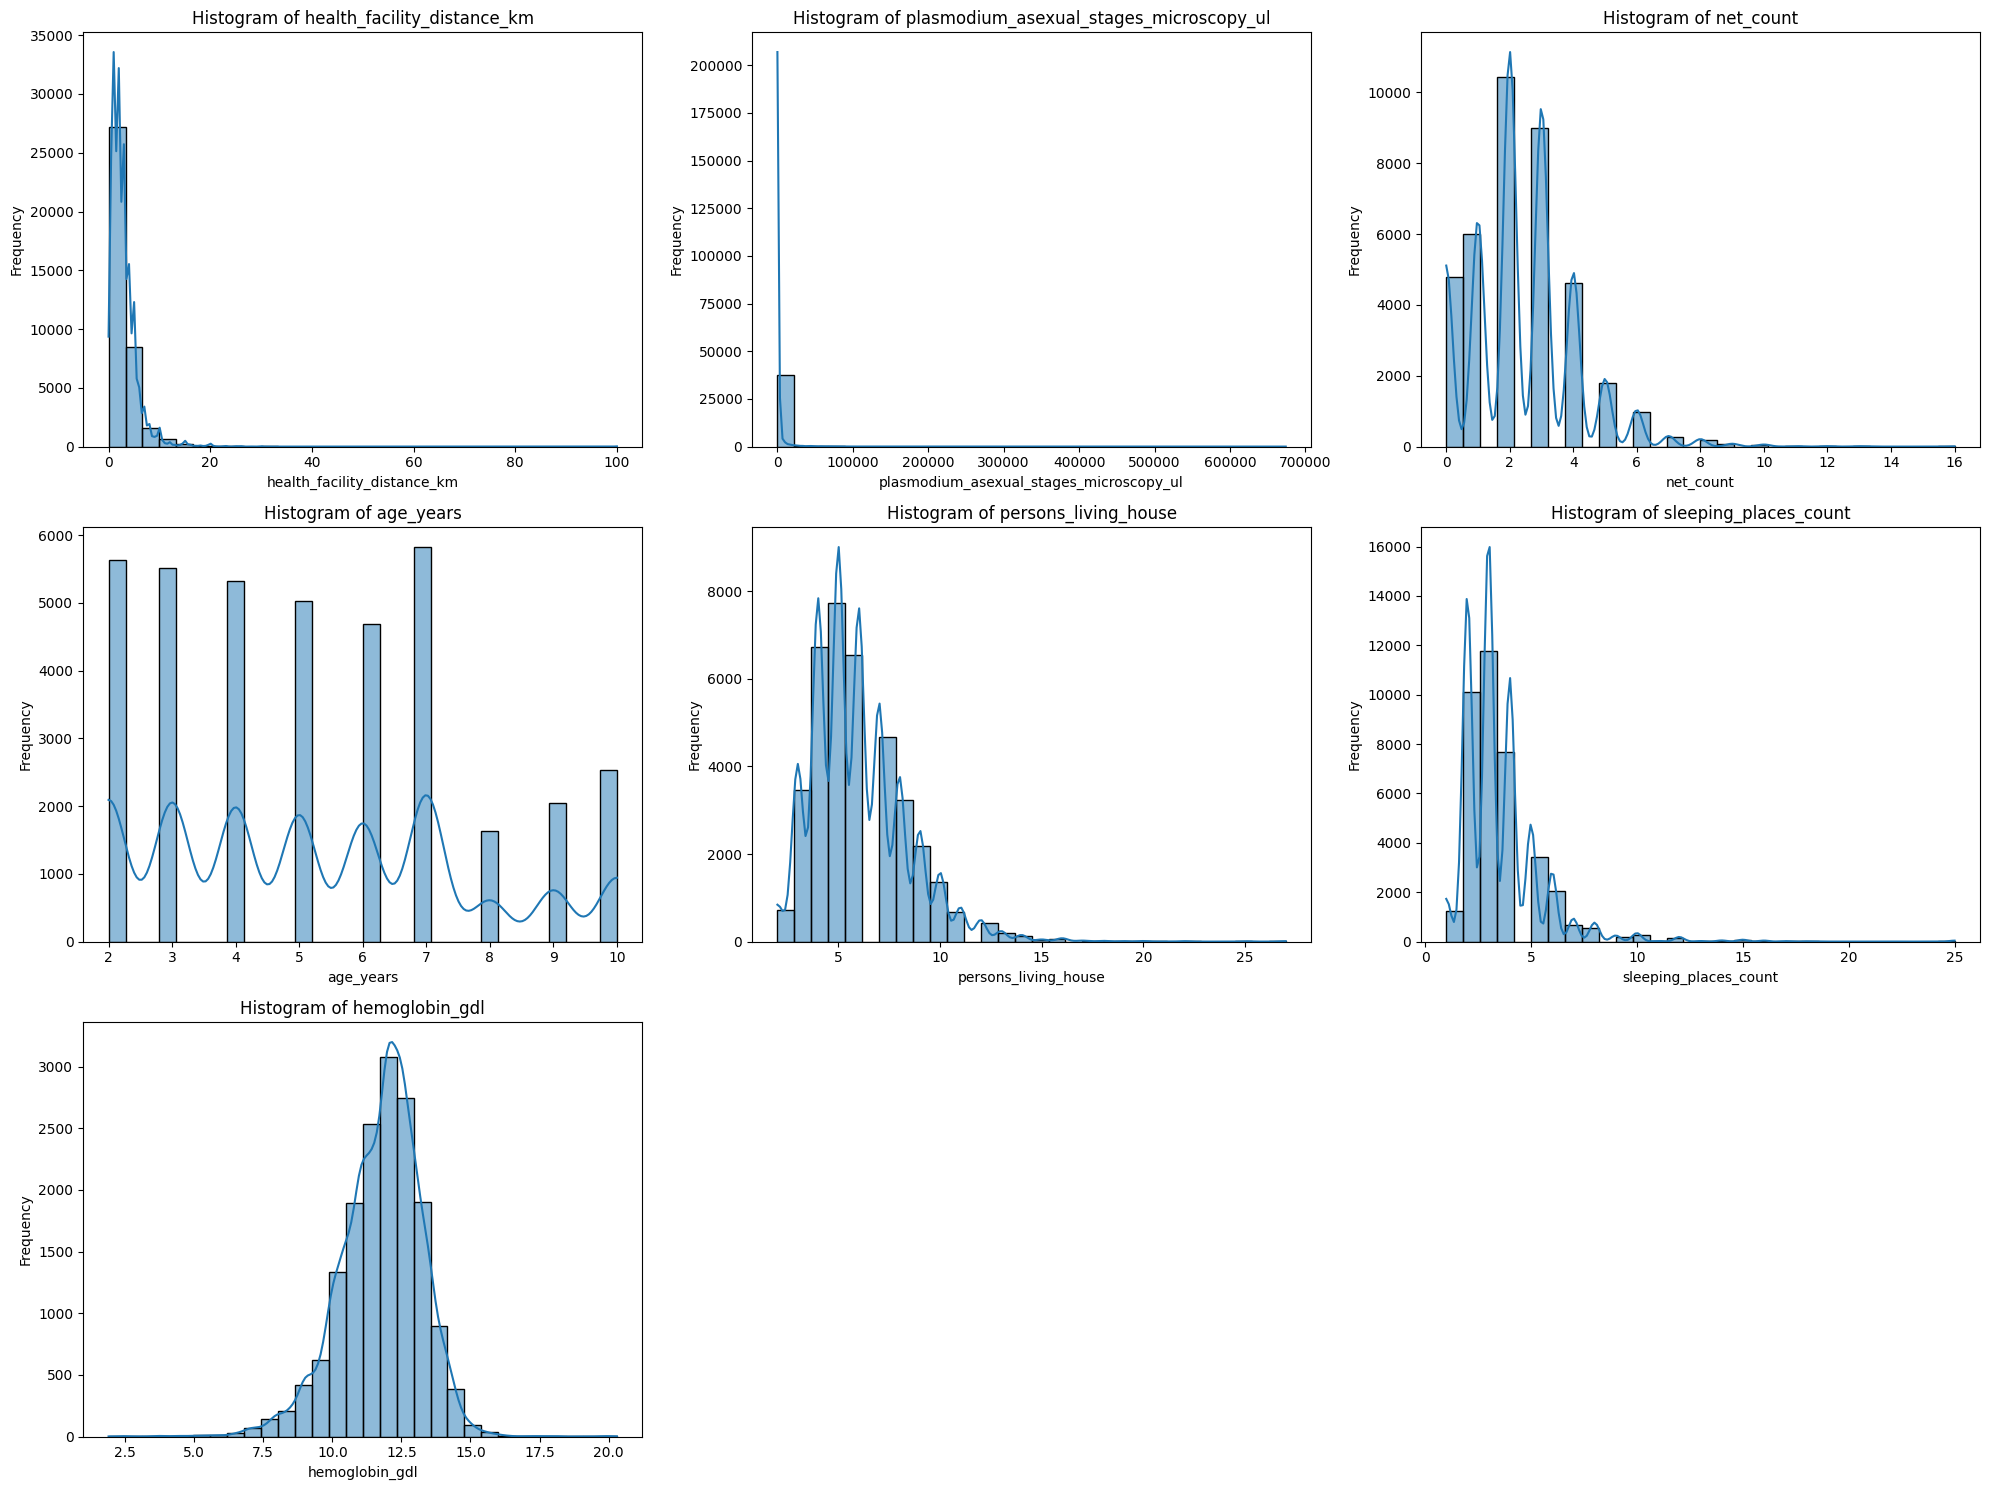

In [53]:
# Set the number of columns for subplots
num_cols = 3  
num_vars = len(numeric_columns)
num_rows = -(-num_vars // num_cols)  # Compute number of rows needed

# Create a figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

# Plot histograms for each numeric variable
for i, col in enumerate(numeric_columns):
    sns.histplot(merged_df[col], bins=30, ax=axes[i], kde=True)  # kde=True adds a kernel density estimate
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [54]:
# Save the transformed dataset
merged_df.to_csv("encoded_dataset.csv", index=False)

# Exploratoty Data Analysis

Malaria Class Distribution:
 malaria
0    29380
1     8861
Name: count, dtype: int64


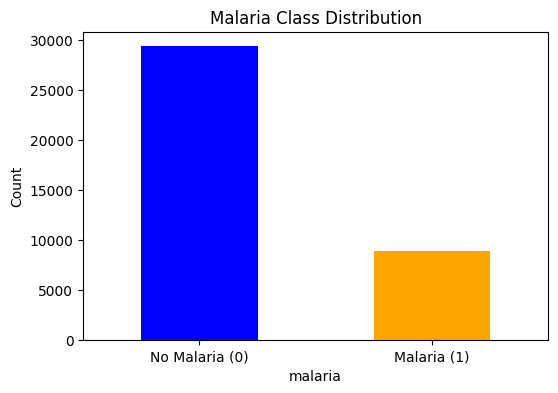

In [55]:
# Count occurrences of each class
class_counts = merged_df['malaria'].value_counts()

# Print counts
print("Malaria Class Distribution:\n", class_counts)

# Plot the distribution
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xticks(ticks=[0, 1], labels=['No Malaria (0)', 'Malaria (1)'], rotation=0)
plt.ylabel("Count")
plt.title("Malaria Class Distribution")
plt.show()


In [56]:
# Summary statistics for numerical columns
num_summary = merged_df.describe().T  # Transpose for better readability
print(num_summary)

                                   count      mean       std  min  25%  50%  \
age_years                        38241.0  5.230120  2.370721  2.0  3.0  5.0   
age_under_2                      38241.0  0.000000  0.000000  0.0  0.0  0.0   
bednet_used_last_night           38241.0  0.692477  0.461474  0.0  0.0  1.0   
eligible_clinical_survey         38241.0  1.000000  0.000000  1.0  1.0  1.0   
febrile_status                   38241.0  0.434952  0.495757  0.0  0.0  0.0   
...                                  ...       ...       ...  ...  ...  ...   
water_source_River or stream     38241.0  0.050391  0.218753  0.0  0.0  0.0   
water_source_Shallow well        38241.0  0.000105  0.010227  0.0  0.0  0.0   
water_source_Unprotected spring  38241.0  0.029236  0.168469  0.0  0.0  0.0   
water_source_Water tank          38241.0  0.000261  0.016169  0.0  0.0  0.0   
water_source_Water truck         38241.0  0.001491  0.038579  0.0  0.0  0.0   

                                 75%   max  
age_ye

In [79]:
import pandas as pd
import plotly.express as px

# Create a new dataframe for analysis (without modifying merged_df)
analysis_df = merged_df.drop(columns=['household_id', 'hemoglobin_gdl', 'windows_covered', 
                                      'plasmodium_detected_thick_smear', 
                                      'plasmodium_detected_rdt', 'rdt_performed',
                                     'plasmodium_asexual_stages_microscopy_ul',
                                     'plasmodium_falciparum_gametocytes_microscopy'])

# Compute correlation of all features with malaria
correlation_with_malaria = analysis_df.corr()['malaria'].sort_values(ascending=False)

# Remove 'malaria' from the correlation list
correlation_with_malaria = correlation_with_malaria.drop('malaria')

# Display top correlated features with malaria
print("Top Features Correlated with Malaria:\n", correlation_with_malaria.head(20))




Top Features Correlated with Malaria:
 febrile_status                                                                       0.361786
has_bicycle                                                                          0.119060
transit_to_health_facility_Bicycling                                                 0.110016
health_facility_distance_category_3 km or more                                       0.098089
meals_per_day_category_2                                                             0.093295
health_facility_distance_km                                                          0.090402
persons_living_house                                                                 0.085435
floor_type_Earth or sand                                                             0.074887
wall_material_Un-burned bricks                                                       0.072208
food_insecurity_weekly_Often                                                         0.070234
has_eaves_Open       

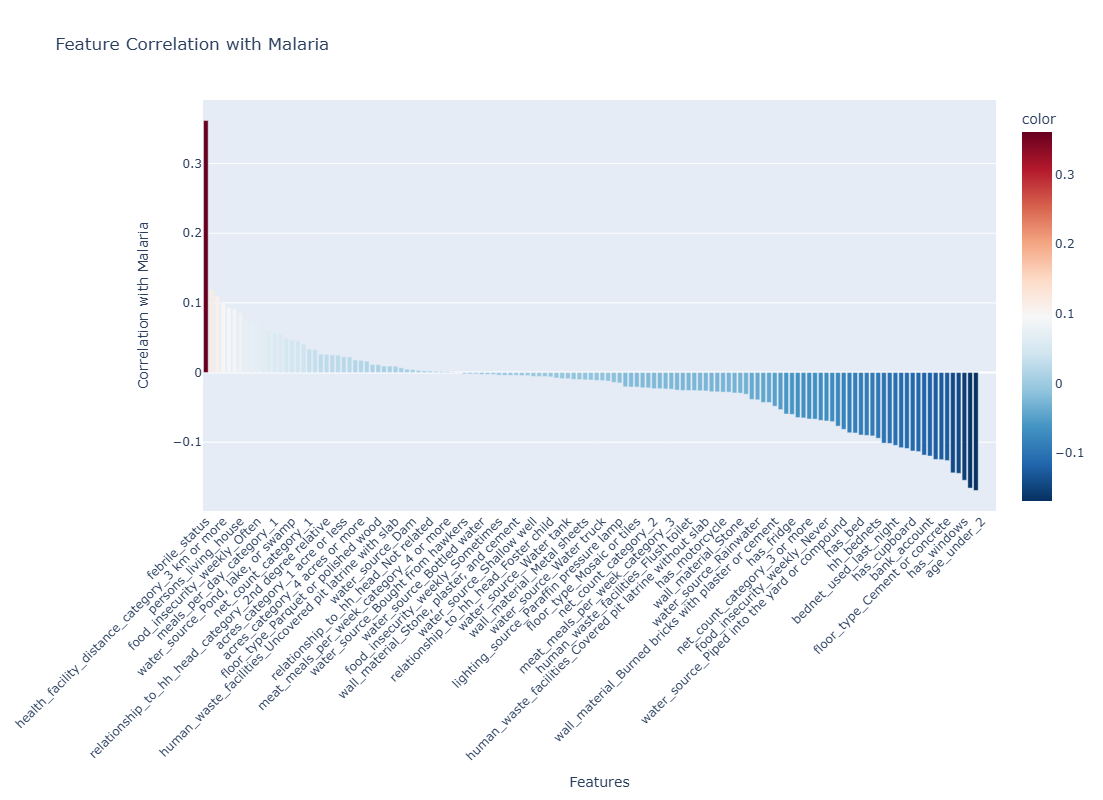

In [81]:
# Interactive bar chart of feature correlations with malaria
fig = px.bar(
    x=correlation_with_malaria.index,
    y=correlation_with_malaria.values,
    labels={'x': "Features", 'y': "Correlation with Malaria"},
    title="Feature Correlation with Malaria",
    color=correlation_with_malaria.values,
    color_continuous_scale="RdBu_r"
)

fig.update_layout(xaxis_tickangle=-45, width=1000, height=800)
fig.show()

## Observations from the Top Correlated Features

### Health & Environmental Factors:
- **febrile_status (0.36)** → Fever is a key malaria symptom, so this makes sense.
- **health_facility_distance_category_3 km or more (0.098)** & **health_facility_distance_km (0.090)** → Distance to health facilities could impact access to treatment.
- **persons_living_house (0.085)** → Overcrowding may increase malaria exposure.

### Living Conditions & Infrastructure:
- **floor_type_Earth or sand (0.074)**, **wall_material_Un-burned bricks (0.072)**, **floor_type_Earth and dung (0.049)** → Poor housing materials might be linked to increased exposure to mosquitoes.
- **has_eaves_Open (0.067)** → Open eaves allow mosquitoes to enter houses.

### Socioeconomic & Behavioral Factors:
- **has_bicycle (0.119)**, **transit_to_health_facility_Bicycling (0.110)** → Could indicate rural populations with less access to healthcare.
- **meals_per_day_category_2 (0.093)**, **meals_per_day_category_1 (0.057)** → Food insecurity might correlate with socioeconomic vulnerability to malaria.
- **food_insecurity_weekly_Often (0.070)** → Higher food insecurity might indicate lower ability to afford malaria prevention (e.g., nets, treatment).

### Water & Sanitation Factors:
- **human_waste_facilities_Uncovered pit latrine without slab (0.061)**, **human_waste_facilities_No facility, bush, or field (0.045)** → Poor sanitation may correlate with malaria exposure.
- **water_source_Pond, lake, or swamp (0.046)** → Stagnant water sources create breeding grounds for mosquitoes.

### Lighting & Net Usage:
- **lighting_source_Paraffin wick lamp (0.056)**, **lighting_source_Flashlight or battery powered lamp (0.040)** → Could be proxies for socioeconomic status.
- **net_count_category_1 (0.033)** → Lower mosquito net usage may increase malaria risk.


In [ ]:
import plotly.express as px
import pandas as pd

# Drop unnecessary columns
df_corr = merged_df.drop(columns=['household_id', 'hemoglobin_gdl', 'windows_covered'])

# Compute correlation matrix
correlation_matrix = df_corr.corr()

# Create an interactive heatmap
fig = px.imshow(
    correlation_matrix,
    labels=dict(color="Correlation"),
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    color_continuous_scale="rdbu_r" 
)

fig.update_layout(
    title="Interactive Feature Correlation Heatmap",
    xaxis=dict(side="bottom"),
    autosize=False,
    width=1000,
    height=1000
)

fig.show()


In [ ]:
categorical_cols = ['sex', 'bednet_used_last_night', 'water_source_Public or private tap']  # Adjust as needed

plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, len(categorical_cols), i + 1)
    sns.countplot(x=col, hue='malaria', data=merged_df)
    plt.title(f"{col} vs. Malaria")
plt.tight_layout()
plt.show()


In [ ]:
numerical_cols = ['age_years', 'hemoglobin_gdl']  # Adjust as needed

plt.figure(figsize=(12, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, len(numerical_cols), i + 1)
    sns.boxplot(x='malaria', y=col, data=merged_df)
    plt.title(f"{col} Distribution by Malaria Status")
plt.tight_layout()
plt.show()


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# --- 1. Initial Data Inspection ---
print("\n--- Initial Data Inspection ---")
print("First 5 rows:\n", merged_df.head())
print("\nShape:", merged_df.shape)
print("\nData types:\n", merged_df.dtypes)
print("\nDescriptive statistics:\n", merged_df.describe())
print("\nMissing values:\n", merged_df.isnull().sum())

# --- 2. Target Variable Analysis ---
print("\n--- Target Variable Analysis ---")
print("Malaria distribution:\n", merged_df['malaria'].value_counts())
sns.countplot(x='malaria', data=merged_df)
plt.title('Distribution of Malaria Cases')
plt.show()

# --- 3. Feature Exploration ---

# --- Demographic Factors ---
print("\n--- Demographic Factors vs. Malaria ---")
# Sex
print("\nSex vs. Malaria:")
print(pd.crosstab(merged_df['sex'], merged_df['malaria']))
sns.countplot(x='sex', hue='malaria', data=merged_df)
plt.title('Malaria Cases by Sex')
plt.show()


# --- Bednet Usage ---
print("\n--- Bednet Usage vs. Malaria ---")
# Bednet Used Last Night
print("\nBednet Used Last Night vs. Malaria:")
print(pd.crosstab(merged_df['bednet_used_last_night'], merged_df['malaria']))
sns.countplot(x='bednet_used_last_night', hue='malaria', data=merged_df)
plt.title('Malaria Cases vs. Bednet Used Last Night')
plt.show()

# --- Economic Factors ---
print("\n--- Economic Factors vs. Malaria ---")
# Has Bicycle
print("\nHas Bicycle vs. Malaria:")
print(pd.crosstab(merged_df['has_bicycle'], merged_df['malaria']))
sns.countplot(x='has_bicycle', hue='malaria', data=merged_df)
plt.title('Malaria Cases vs. Has Bicycle')
plt.show()

# --- Statistical Tests (Chi-Square) ---
print("\n--- Statistical Tests (Chi-Square) ---")
def perform_chi2(col1, col2):
    contingency_table = pd.crosstab(merged_df[col1], merged_df[col2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square test between {col1} and {col2}:")
    print(f"P-value: {p:.4f}")
    if p < 0.05:
        print("The variables are significantly associated.")
    else:
        print("The variables are NOT significantly associated.")

perform_chi2('sex', 'malaria')
perform_chi2('bednet_used_last_night', 'malaria')
perform_chi2('has_bicycle', 'malaria')

print("\nEDA Complete.  Review the outputs and visualizations to identify key relationships and potential feature engineering opportunities.")
